In [21]:
from pathlib import Path
import sys
import os

# Add src/ and lib/ to sys.path
SUNLIGHT_HOME = Path().resolve().parent
sys.path.append(str(SUNLIGHT_HOME / "src/sunlight_engine"))
sys.path.append(str(SUNLIGHT_HOME / "src/sunlight_engine/lib"))
#sys.path.append(str(SUNLIGHT_HOME / "lib"))

os.environ["SUNLIGHT_HOME"] = str(SUNLIGHT_HOME)

# DEBUG
#for path in sys.path: print(path)
#print(os.getenv("SUNLIGHT_HOME"))


In [22]:
from config_interface import ConfigInterface
configInterface = ConfigInterface()
configInterface.gen_runtime_config()
configInterface.load_runtime_config()
#print(configInterface.CONFIG_DIR)

In [8]:
from logging_setup import Logger
logger = Logger("workspaceDEV")
logger.info("Started Workspace in Jupyter Notebook /dev/workspace")

In [11]:
from astropy.coordinates import EarthLocation, AltAz, get_sun
import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u
from datetime import datetime
import zoneinfo  # or use pytz if < Python 3.9


In [12]:
# Define local time zone (Stockholm)
local_tz = zoneinfo.ZoneInfo("Europe/Stockholm")

# Get current time in local timezone
now_local = datetime.now(local_tz)

# Convert to astropy Time (will handle UTC offset correctly)
now = Time(now_local)

# Location in Stockholm
loc = EarthLocation(lat=59.3225607 * u.deg, lon=17.9904006 * u.deg)

# AltAz frame at local time and location
altaz = AltAz(location=loc, obstime=now)

# Sun position in AltAz
sun = get_sun(now)
sun_altaz = sun.transform_to(altaz)

# Print result
print(f"Local time: {now_local}")
print(f"Altitude: {sun_altaz.alt:.2f}, Azimuth: {sun_altaz.az:.2f}")


Local time: 2025-05-31 17:39:39.336559+02:00
Altitude: 27.19 deg, Azimuth: 267.70 deg


In [13]:
from astropy.coordinates import EarthLocation, AltAz, get_sun
from astropy.time import Time
import astropy.units as u
from datetime import datetime, timedelta
import zoneinfo

# Define local time zone (Stockholm)
local_tz = zoneinfo.ZoneInfo("Europe/Stockholm")

# Define location (Stockholm)
loc = EarthLocation(lat=59.3225607 * u.deg, lon=17.9904006 * u.deg)

# Set year and build time range
year = 2026
start = datetime(year, 1, 1, 0, 0, tzinfo=local_tz)
end = datetime(year, 12, 31, 23, 0, tzinfo=local_tz)
total_hours = int((end - start).total_seconds() // 3600)

# Build datetime list
times = [start + timedelta(hours=h) for h in range(total_hours + 1)]

# Convert to astropy Time
time_astropy = Time(times)

# Create AltAz frame with all times
altaz = AltAz(location=loc, obstime=time_astropy)

# Get sun positions
sun = get_sun(time_astropy)
sun_altaz = sun.transform_to(altaz)

# Store results in a list of dicts
sun_data = [
    {
        "datetime": times[i].isoformat(),
        "altitude_deg": float(sun_altaz.alt[i].deg),
        "azimuth_deg": float(sun_altaz.az[i].deg)
    }
    for i in range(len(times))
]

# Example: print first 5
for entry in sun_data[:5]:
    print(entry)


{'datetime': '2026-01-01T00:00:00+01:00', 'altitude_deg': -53.667127615154115, 'azimuth_deg': 3.361515024983283}
{'datetime': '2026-01-01T01:00:00+01:00', 'altitude_deg': -51.719726156862414, 'azimuth_deg': 25.994149158433654}
{'datetime': '2026-01-01T02:00:00+01:00', 'altitude_deg': -47.208755750049704, 'azimuth_deg': 46.139568663843264}
{'datetime': '2026-01-01T03:00:00+01:00', 'altitude_deg': -40.96511218593961, 'azimuth_deg': 63.329730045514125}
{'datetime': '2026-01-01T04:00:00+01:00', 'altitude_deg': -33.75273151294988, 'azimuth_deg': 78.16765648967977}


In [14]:
sun_data

[{'datetime': '2026-01-01T00:00:00+01:00',
  'altitude_deg': -53.667127615154115,
  'azimuth_deg': 3.361515024983283},
 {'datetime': '2026-01-01T01:00:00+01:00',
  'altitude_deg': -51.719726156862414,
  'azimuth_deg': 25.994149158433654},
 {'datetime': '2026-01-01T02:00:00+01:00',
  'altitude_deg': -47.208755750049704,
  'azimuth_deg': 46.139568663843264},
 {'datetime': '2026-01-01T03:00:00+01:00',
  'altitude_deg': -40.96511218593961,
  'azimuth_deg': 63.329730045514125},
 {'datetime': '2026-01-01T04:00:00+01:00',
  'altitude_deg': -33.75273151294988,
  'azimuth_deg': 78.16765648967977},
 {'datetime': '2026-01-01T05:00:00+01:00',
  'altitude_deg': -26.146655523898733,
  'azimuth_deg': 91.47865578088582},
 {'datetime': '2026-01-01T06:00:00+01:00',
  'altitude_deg': -18.578539834151723,
  'azimuth_deg': 103.96962232725299},
 {'datetime': '2026-01-01T07:00:00+01:00',
  'altitude_deg': -11.40375610534989,
  'azimuth_deg': 116.18083154252164},
 {'datetime': '2026-01-01T08:00:00+01:00',
  '

Matplotlib is building the font cache; this may take a moment.


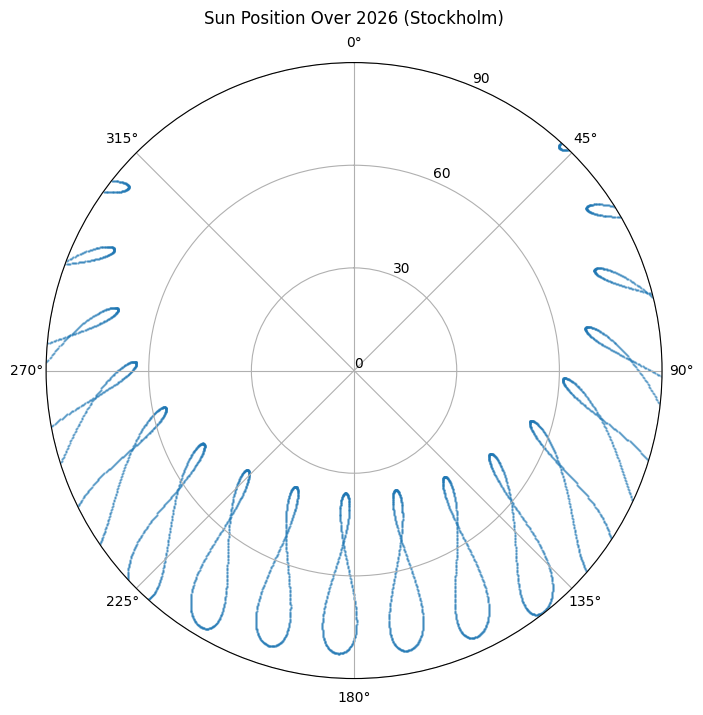

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Convert degrees to radians for polar plot
azimuths = np.radians([entry["azimuth_deg"] for entry in sun_data])
altitudes = [entry["altitude_deg"] for entry in sun_data]

# Only include points where the sun is above the horizon
azimuths = np.array(azimuths)
altitudes = np.array(altitudes)
mask = altitudes > 0

azimuths = azimuths[mask]
altitudes = altitudes[mask]

# Convert altitude to distance from centre (90 - altitude)
r = 90 - altitudes  # so zenith (90°) is center, horizon (0°) is edge

# Plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.scatter(azimuths, r, s=0.5, alpha=0.5)

# Invert radius so horizon is outer ring
ax.set_ylim(0, 90)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)  # Clockwise

ax.set_title("Sun Position Over 2026 (Stockholm)", va='bottom')
ax.set_rticks([0, 30, 60, 90])  # Optional: zenith to horizon

plt.show()


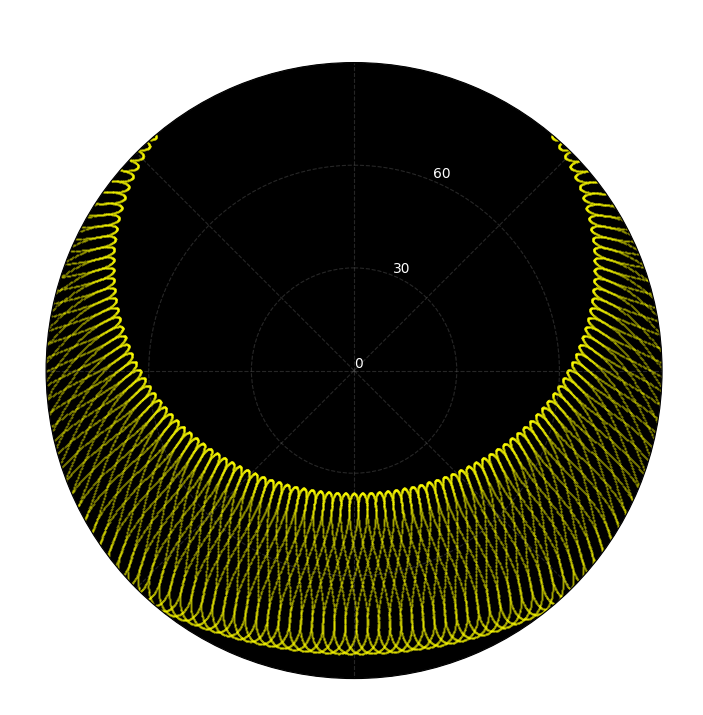

In [16]:
from astropy.coordinates import EarthLocation, AltAz, get_sun
from astropy.time import Time
import astropy.units as u
from datetime import datetime, timedelta
import zoneinfo
import numpy as np
import matplotlib.pyplot as plt

# Location and timezone
loc = EarthLocation(lat=59.3225607 * u.deg, lon=17.9904006 * u.deg)
local_tz = zoneinfo.ZoneInfo("Europe/Stockholm")

# Generate times for 2026 every 10 minutes
year = 2026
start = datetime(year, 1, 1, 0, 0, tzinfo=local_tz)
end = datetime(year, 12, 31, 23, 59, tzinfo=local_tz)
interval = timedelta(minutes=10)

times = []
t = start
while t <= end:
    times.append(t)
    t += interval

# Convert to astropy Time
time_astropy = Time(times)
altaz = AltAz(location=loc, obstime=time_astropy)

# Sun positions
sun = get_sun(time_astropy).transform_to(altaz)

# Extract values
azimuths = np.radians(sun.az.deg)
altitudes = sun.alt.deg

# Filter to only sun above horizon
mask = altitudes > 0
azimuths = azimuths[mask]
altitudes = altitudes[mask]
r = 90 - altitudes  # for polar plot: zenith = center

# Plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_facecolor("black")
ax.scatter(azimuths, r, s=0.2, color="yellow", alpha=0.5)

ax.set_ylim(0, 90)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ax.set_rticks([0, 30, 60, 90])
ax.set_title("Sun Coverage (2026, Stockholm)", va='bottom', color='white')
ax.tick_params(colors='white')
ax.grid(True, color='gray', linestyle='--', alpha=0.3)

plt.show()


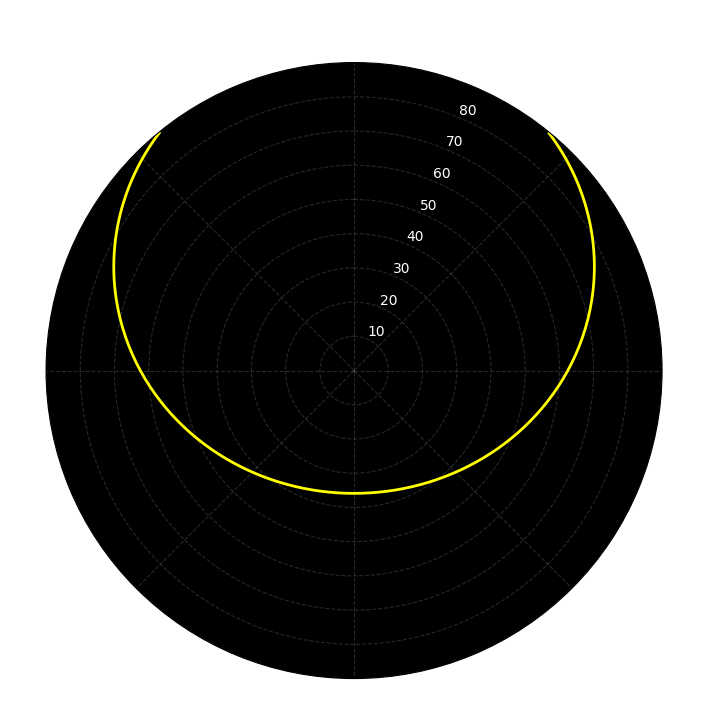

In [17]:
from astropy.coordinates import EarthLocation, AltAz, get_sun
from astropy.time import Time
import astropy.units as u
from datetime import datetime, timedelta
import zoneinfo
import numpy as np
import matplotlib.pyplot as plt

# Location and timezone
loc = EarthLocation(lat=59.3225607 * u.deg, lon=17.9904006 * u.deg)
tz = zoneinfo.ZoneInfo("Europe/Stockholm")

# Pick the day: 21 June 2026
date = datetime(2026, 6, 21, 0, 0, tzinfo=tz)
times = [date + timedelta(minutes=i) for i in range(0, 24*60, 5)]  # every 5 minutes

# Astropy time and AltAz frame
time_astropy = Time(times)
altaz = AltAz(location=loc, obstime=time_astropy)
sun = get_sun(time_astropy).transform_to(altaz)

# Prepare data for polar plot
azimuths = np.radians(sun.az.deg)
altitudes = sun.alt.deg

# Filter sun above horizon
mask = altitudes > 0
azimuths = azimuths[mask]
r = 90 - altitudes[mask]

# Plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_facecolor("black")
ax.plot(azimuths, r, color="yellow", linewidth=2)

ax.set_ylim(0, 90)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("Sun Path on 21 June 2026 (Stockholm)", va='bottom', color='white')
ax.tick_params(colors='white')
ax.grid(True, color='gray', linestyle='--', alpha=0.3)

plt.show()


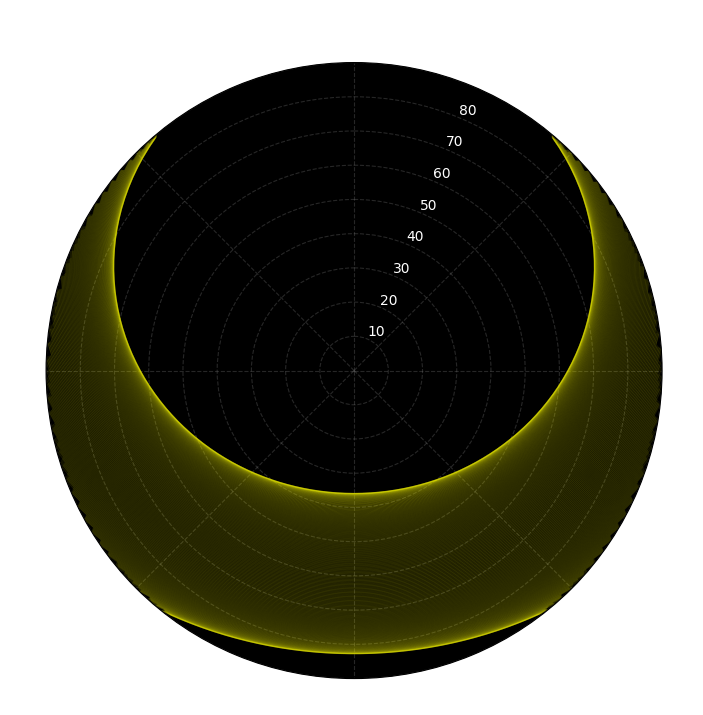

In [18]:
from astropy.coordinates import EarthLocation, AltAz, get_sun
from astropy.time import Time
import astropy.units as u
from datetime import datetime, timedelta
import zoneinfo
import numpy as np
import matplotlib.pyplot as plt

# Setup
loc = EarthLocation(lat=59.3225607 * u.deg, lon=17.9904006 * u.deg)
tz = zoneinfo.ZoneInfo("Europe/Stockholm")
year = 2026

# Plot setup
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_facecolor("black")

# Loop over each day of the year
for day in range(1, 366):  # 365 days (not a leap year)
    try:
        date = datetime(year, 1, 1, tzinfo=tz) + timedelta(days=day - 1)
        times = [date + timedelta(minutes=i) for i in range(0, 24*60, 10)]  # every 10 min

        time_astropy = Time(times)
        altaz = AltAz(location=loc, obstime=time_astropy)
        sun = get_sun(time_astropy).transform_to(altaz)

        az = np.radians(sun.az.deg)
        alt = sun.alt.deg

        mask = alt > 0
        az = az[mask]
        r = 90 - alt[mask]

        ax.plot(az, r, color="yellow", alpha=0.1, linewidth=0.8)

    except Exception as e:
        print(f"Error on day {day}: {e}")

# Final styling
ax.set_ylim(0, 90)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("Sun Paths (Stockholm, 2026)", va='bottom', color='white')
ax.tick_params(colors='white')
ax.grid(True, color='gray', linestyle='--', alpha=0.3)

plt.show()


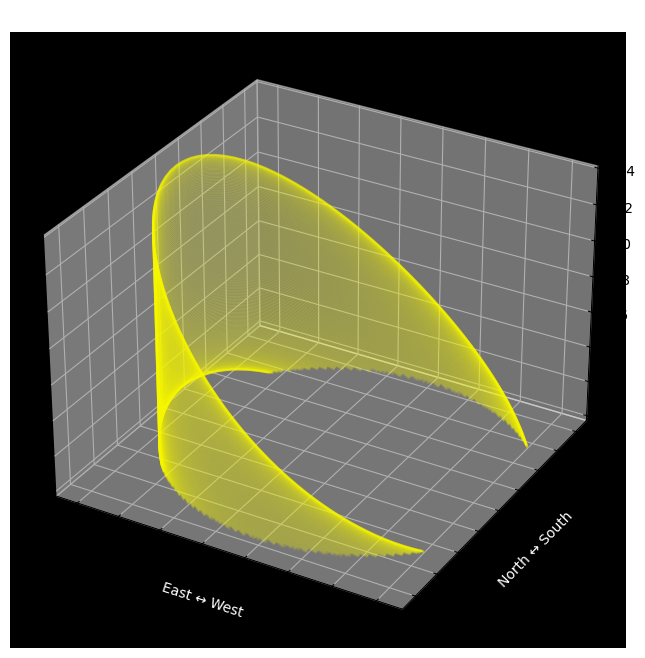

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import EarthLocation, AltAz, get_sun
from astropy.time import Time
import astropy.units as u
from datetime import datetime, timedelta
import zoneinfo

# Setup
loc = EarthLocation(lat=59.3225607 * u.deg, lon=17.9904006 * u.deg)
tz = zoneinfo.ZoneInfo("Europe/Stockholm")
year = 2026

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor("black")

# Loop over each day
for day in range(1, 366):
    try:
        date = datetime(year, 1, 1, tzinfo=tz) + timedelta(days=day - 1)
        times = [date + timedelta(minutes=i) for i in range(0, 24 * 60, 10)]

        time_astropy = Time(times)
        altaz = AltAz(location=loc, obstime=time_astropy)
        sun = get_sun(time_astropy).transform_to(altaz)

        # Filter sun above horizon
        alt = sun.alt.deg
        az = np.radians(sun.az.deg)
        mask = alt > 0

        # Fixed radius, use azimuth for direction, altitude for height
        radius = 1
        x = radius * np.cos(az[mask])
        y = radius * np.sin(az[mask])
        z = np.tan(np.radians(alt[mask]))  # exaggerate height with tangent

        ax.plot(x, y, z, color='yellow', alpha=0.1)

    except Exception as e:
        print(f"Day {day} failed: {e}")

# Axes settings
ax.set_title("3D Sun Paths (Stockholm, 2026)", color='white')
ax.set_xlabel("East ↔ West")
ax.set_ylabel("North ↔ South")
ax.set_zlabel("Sun Height")
ax.grid(True, linestyle='--', alpha=0.3)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')

plt.show()


In [34]:
from astropy.coordinates import EarthLocation, AltAz, get_sun
from astropy.time import Time
import astropy.units as u
from datetime import datetime, timedelta
import zoneinfo
import numpy as np

import calendar


from config_interface import ConfigInterface
configInterface = ConfigInterface()
configInterface.gen_runtime_config()
configInterface.load_runtime_config()
#print(configInterface.CONFIG_DIR)

configInterface.CONFIG_DIR

def read_configuration() :
    #return configInterface.CONFIG_DIR
    return {"location":{"latitude":60.750620,"longitude":14.857265,"elevation":172.81},"sim_time":{"timezone":"Europe/Stockholm","year":2026,"period":15,"unit":"minutes"}
}

def get_total_days_in_a_year(year) :
    days_in_year = 366 if calendar.isleap(2026) else 365

def create_data() :

    CONFIG = read_configuration()

    days_in_year = 1 #= get_total_days_in_a_year(CONFIG['sim_time']['year'])

    # Setup
    loc = EarthLocation(lat=CONFIG['location']['latitude'] * u.deg, lon=CONFIG['location']['longitude'] * u.deg)
    tz = zoneinfo.ZoneInfo(CONFIG['sim_time']['timezone'])
    year = CONFIG['sim_time']['year']

    for day in range(0, days_in_year) :
        try:
            # Date for the day
            date  = datetime(year, 1, 1, tzinfo=tz) + timedelta(days=day)

            # Array of times for the day
            times = [ date + timedelta(minutes=i) for i in range(0, 24*60, 10) ] 

            # Create astropy time formart
            time_astropy = Time(times)

            altaz = AltAz(location=loc, obstime=time_astropy)
            sun = get_sun(time_astropy).transform_to(altaz)

            az = np.radians(sun.az.deg)
            alt = sun.alt.deg

            mask = alt > 0
            az = az[mask]
            r = 90 - alt[mask]

        except Exception as e:
            print(f"Error on day {day}: {e}")

In [39]:
alt

array([-53.7563392 , -53.63275074, -53.42391467, -53.13146857,
       -52.75764731, -52.30521173, -51.77736595, -51.17766902,
       -50.5099459 , -49.77820236, -48.98654708, -48.13912313,
       -47.24005024, -46.29337796, -45.30304927, -44.27287402,
       -43.2065107 , -42.10745552, -40.97903734, -39.82441739,
       -38.64659254, -37.44840133, -36.2325319 , -35.00153115,
       -33.75781474, -32.50367741, -31.24130339, -29.97277664,
       -28.70009082, -27.42515879, -26.14982164, -24.87585723,
       -23.60498802, -22.33888854, -21.07919208, -19.82749699,
       -18.58537229, -17.35436282, -16.13599384, -14.93177509,
       -13.74320431, -12.57177033, -11.41895558, -10.28623806,
        -9.17509291,  -8.08699331,  -7.02341095,  -5.98581592,
        -4.97567604,  -3.99445562,  -3.04361369,  -2.12460159,
        -1.23886003,  -0.38781554,   0.4271236 ,   1.20457201,
         1.94317239,   2.64160111,   3.29857427,   3.91285414,
         4.48325579,   5.00865406,   5.48799044,   5.92

In [ ]:
from astropy.coordinates import EarthLocation, AltAz, get_sun
from astropy.time import Time
import astropy.units as u
from datetime import datetime, timedelta
import zoneinfo
import numpy as np
import matplotlib.pyplot as plt

import calendar



def get_total_days_in_a_year(year) :
    days_in_year = 366 if calendar.isleap(2026) else 365

def create_data(year) :
    days_in_year = get_total_days_in_a_year(year)

    for day in range(0, days_in_year) :
        try:
            # Date for the day
            date  = datetime(year, 1, 1, tzinfo=tz) + timedelta(days=day)

            # Array of times for the day
            times = [ date + timedelta(minutes=i) for i in range(0, 24*60, 10) ] 

            # Create astropy time formart
            time_astropy = Time(times)

            altaz = AltAz(location=loc, obstime=time_astropy)
            sun = get_sun(time_astropy).transform_to(altaz)

            az = np.radians(sun.az.deg)
            alt = sun.alt.deg

            mask = alt > 0
            az = az[mask]
            r = 90 - alt[mask]

        except Exception as e:
            print(f"Error on day {day}: {e}")




ax.plot(az, r, color="yellow", alpha=0.1, linewidth=0.8)





# Plot setup
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_facecolor("black")

# Final styling
ax.set_ylim(0, 90)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("Sun Paths (Stockholm, 2026)", va='bottom', color='white')
ax.tick_params(colors='white')
ax.grid(True, color='gray', linestyle='--', alpha=0.3)

plt.show()
